## Inferential Statistics and EDA: bikeshare data for Capstone 1

Let's continue with the test file of bikeshare data, Quarter 1 in 2016. 

As a reminder, the data can be found here, https://s3.amazonaws.com/capitalbikeshare-data/index.html.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
bikeshare = pd.read_csv('../CapstoneDrafts/data/2016-Q1-Trips-History-Data.csv', 
                        parse_dates=True, date_parser=dateparse, index_col='Start date')
bikeshare.columns = ['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype']
bikeshare.duration = bikeshare.duration * 1.66667e-5

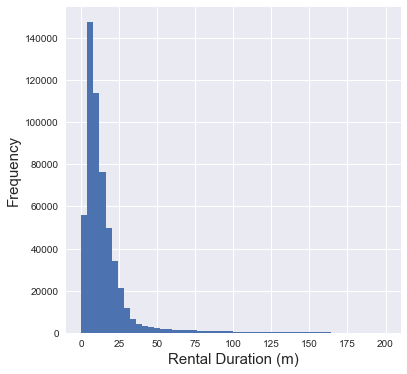

In [48]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6,6)
bikeshare.plot(y='duration', kind='hist', bins=50, range=(0,200), ax=ax,legend=False)
ax.set_xlabel('Rental Duration (m)',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
plt.savefig('bike_histo',bbox_inches='tight',dpi=300)

In the data story assignment, it looked like there were some differences in duration based on the user type (registered or casual).  For this assignment, I will focus in on duration of rentals.

Here is the raw and smoothed duration data over the quarter:

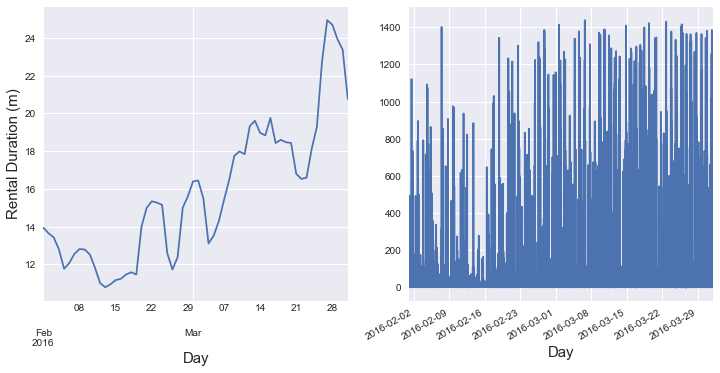

In [4]:
fig, axes = plt.subplots(1, 2, sharey=False)
fig.set_size_inches(12,6)
duration = bikeshare['duration']
smoothed = duration.resample('D').mean().rolling(window=5).mean()
smoothed.loc['2016-02':'2016-03'].plot(ax=axes[0])
duration.loc['2016-02':'2016-03'].plot(ax=axes[1])
axes[0].set_xlabel('Day',fontsize=15)
axes[0].set_ylabel('Rental Duration (m)',fontsize=15)
axes[1].set_xlabel('Day',fontsize=15)

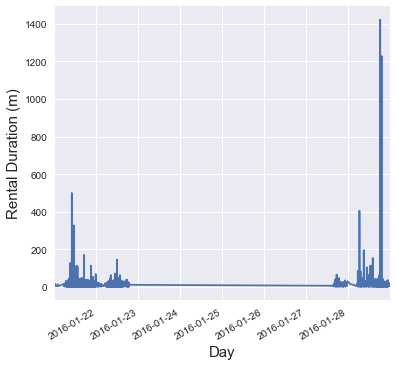

In [26]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6,6)
duration = bikeshare['duration']
duration.loc['2016-01-21':'2016-01-28'].plot(ax=ax)
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Rental Duration (m)',fontsize=15)

The data gap is from sometime on Jan 22 through sometime on Jan 27

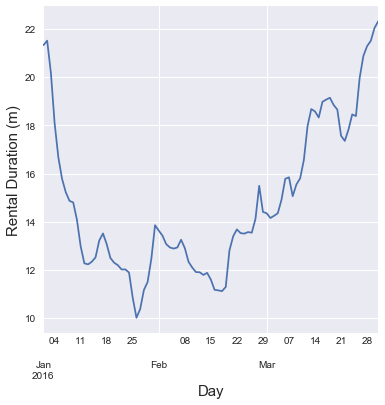

In [49]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6,6)
smoothed = duration.resample('D').mean().rolling(window=9, min_periods=1).mean()
smoothed.plot(ax=ax)
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Rental Duration (m)',fontsize=15)
plt.savefig('bike_rolling',bbox_inches='tight',dpi=300)

Are there different durations for registered versus casual members?

In [50]:
durationReg = bikeshare['duration'][bikeshare['memtype']=='Registered']
durationCas = bikeshare['duration'][bikeshare['memtype']=='Casual']

smoothedReg = durationReg.resample('D').mean().rolling(window=8, min_periods=1).mean()
smoothedCas = durationCas.resample('D').mean().rolling(window=8, min_periods=1).mean()

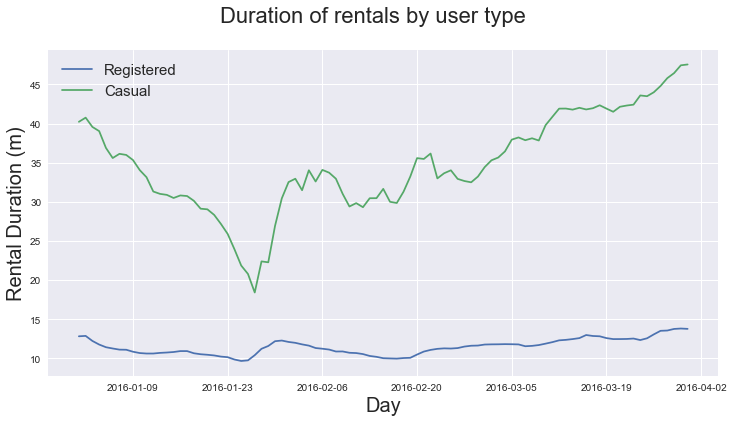

In [51]:
fig, ax = plt.subplots(1)
fig.set_size_inches(12,6)
ax.plot(smoothedReg, label='Registered')
ax.plot(smoothedCas, label='Casual')
ax.set_xlabel('Day',fontsize=20)
ax.set_ylabel('Rental Duration (m)',fontsize=20)
fig.suptitle('Duration of rentals by user type', fontsize=22)
ax.legend(fontsize=15)
plt.savefig('bike_rolling_type',bbox_inches='tight',dpi=300)

In [70]:
bikeshare['startdate'] = bikeshare.index
bikeshare['startweekday'] = bikeshare['startdate'].apply(lambda d: d.weekday())

bikeshare[20000:20010] # confirming weekday mapping

,duration,enddate,startlocID,startloc,endlocID,endloc,bikeID,memtype,startdate,startweekday
Start date,,,,,,,,,,
2016-03-30 08:41:00,7.729332,3/30/2016 8:49,31089,Court House Metro / 15th & N Uhle St,31014,Lynn & 19th St North,W20789,Registered,2016-03-30 08:41:00,2
2016-03-30 08:41:00,11.986174,3/30/2016 8:53,31628,1st & K St SE,31623,Columbus Circle / Union Station,W20996,Registered,2016-03-30 08:41:00,2
2016-03-30 08:41:00,13.340910,3/30/2016 8:54,31102,11th & Kenyon St NW,31215,Georgetown Harbor / 30th St NW,W20567,Registered,2016-03-30 08:41:00,2
2016-03-30 08:41:00,4.222358,3/30/2016 8:45,31251,12th & L St NW,31222,New York Ave & 15th St NW,W20361,Registered,2016-03-30 08:41:00,2
2016-03-30 08:41:00,12.869092,3/30/2016 8:54,31202,14th & R St NW,31211,Kennedy Center,W00153,Registered,2016-03-30 08:41:00,2
2016-03-30 08:41:00,6.911047,3/30/2016 8:48,31212,21st & M St NW,31242,18th St & Pennsylvania Ave NW,W22205,Registered,2016-03-30 08:41:00,2
2016-03-30 08:41:00,26.308903,3/30/2016 9:07,31074,TJ Cmty Ctr / 2nd St & S Old Glebe Rd,31234,20th & O St NW / Dupont South,W21269,Registered,2016-03-30 08:41:00,2
2016-03-30 08:41:00,12.090208,3/30/2016 8:53,31102,11th & Kenyon St NW,31254,15th & K St NW,W21535,Registered,2016-03-30 08:41:00,2
2016-03-30 08:41:00,2.832172,3/30/2016 8:44,32045,Shady Grove Metro West,32037,King Farm Blvd & Pleasant Dr,W00986,Registered,2016-03-30 08:41:00,2


In [86]:
FreqReg=bikeshare['startweekday'][bikeshare['memtype']=='Registered'].value_counts().sort_index()
FreqCas=bikeshare['startweekday'][bikeshare['memtype']=='Casual'].value_counts().sort_index()
ticks=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
axes.ttitlesize(15)
axes.labelsize(15) 
fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(12,8)
FreqReg.plot(kind='bar', ax=axes[0],title='Registered')
FreqCas.plot(kind='bar', ax=axes[1],title='Casual')
axes[0].set_xticklabels(ticks)
axes[1].set_xticklabels(ticks)
fig.suptitle('Frequency of rentals by user type', fontsize=25)
axes[0].set_xlabel('Day of the Week',fontsize=20)
axes[0].set_ylabel('Rental Frequency',fontsize=20)
axes[1].set_xlabel('Day of the Week',fontsize=20)
plt.savefig('bike_histo_type',bbox='tight',dpi=300)

AttributeError: 'numpy.ndarray' object has no attribute 'titlesize'

It looks like there are some consistent differences in rental durations between registered and casual users.  For this exercise, I'll use some basic inferential statistics to understand whether this difference is significant.

Goals:
- define hypothesis test
- calculate mean and standard error for each group
- visualize the means for this quarter using a box plot
- perform a two-sided t-test (calculate critical value & find corresponding p-value)
- interpret results

#### Hypothesis test

**Null hypothesis:** Rental duration for casual users is the same as for registered users. 

**Alternative hypothesis:** Rental duration for casual users is larger than registered users. 

In [7]:
# calculate means
meanCas=np.mean(durationCas)
meanReg=np.mean(durationReg)
print('mean causal users',meanCas)
print('mean registered users',meanReg)

# calculate SE
SECas=stats.sem(durationCas)
SEReg=stats.sem(durationReg)
print('SE casual',SECas)
print('SE casual',SEReg)

mean causal users 42.25841142278598
mean registered users 11.884240396662934
SE casual 0.209680232022
SE casual 0.0355602844394


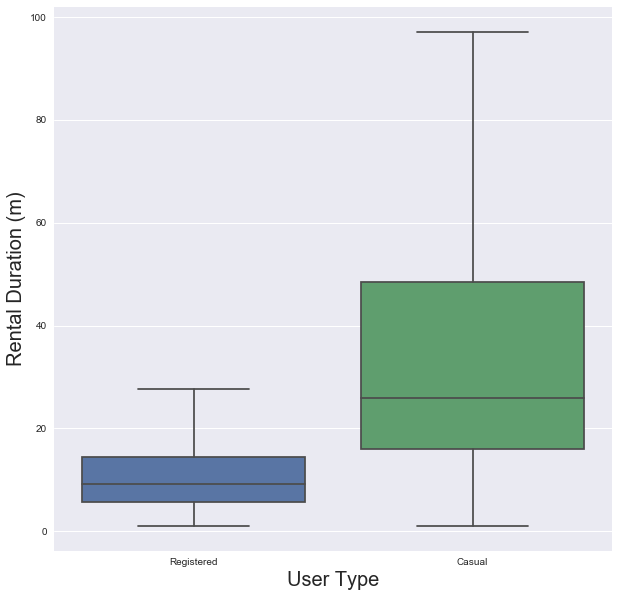

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=[durationReg, durationCas],showfliers=False)
labels=['Registered','Casual']
ax.set_xlabel('User Type',fontsize=20)
ax.set_ylabel('Rental Duration (m)',fontsize=20)
ax.set_xticklabels(labels)
plt.savefig('bike_rolling_box',bbox_inches='tight',dpi=300)

In [38]:
stats.ttest_ind(durationCas, durationReg)

Ttest_indResult(statistic=248.43164581330646, pvalue=0.0)

- This p-value is much less than 0.05, and so we can accept the alternative hypothesis, that the duration of rentals is different for each user type.

In [46]:
Cas_Int=stats.t.interval(0.95, len(durationCas)-1, loc=meanCas, scale=SECas)
print('Confidence Interval for the mean duration of Casual users',Cas_Int)
Reg_Int=stats.t.interval(0.95, len(durationReg)-1, loc=meanReg, scale=SEReg)
print('Confidence Interval for the mean duration of Registered users',Reg_Int)

Confidence Interval for the mean duration of Casual users (41.847439865347418, 42.669382980224547)
Confidence Interval for the mean duration of Registered users (11.814543339408399, 11.953937453917469)


- These confidence intervals are not overlapping - in fact, they are quite far apart.

#### Conclusion
- The $t$-test and confidence intervals confirm that the duration of rentals for casual users and registered users are different in this test data set.

## Next steps:

To move this story forward, we can ask some questions, such as:
1. Can we predict user type by the bike ride duration?
2. Can we predict user type by the day of the week?
3. Compare this winter/spring data to summer or fall data - do the answers to the above questions change?